# Week7, CS: Clustering the Countries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("Country-data.csv")
df = data.copy()

In [3]:
df.head(100).tail(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
90,Lithuania,6.1,65.3,7.04,67.2,21100,2.38,73.2,1.50,12000
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000
92,"Macedonia, FYR",10.4,39.8,7.09,58.1,11400,2.04,74.0,1.47,4540
93,Madagascar,62.2,25.0,3.77,43.0,1390,8.79,60.8,4.60,413
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
95,Malaysia,7.9,86.9,4.39,71.0,21100,7.27,74.5,2.15,9070
96,Maldives,13.2,77.6,6.33,65.4,10500,2.88,77.9,2.23,7100
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708
98,Malta,6.8,153.0,8.65,154.0,28300,3.83,80.3,1.36,21100
99,Mauritania,97.4,50.7,4.41,61.2,3320,18.90,68.2,4.98,1200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


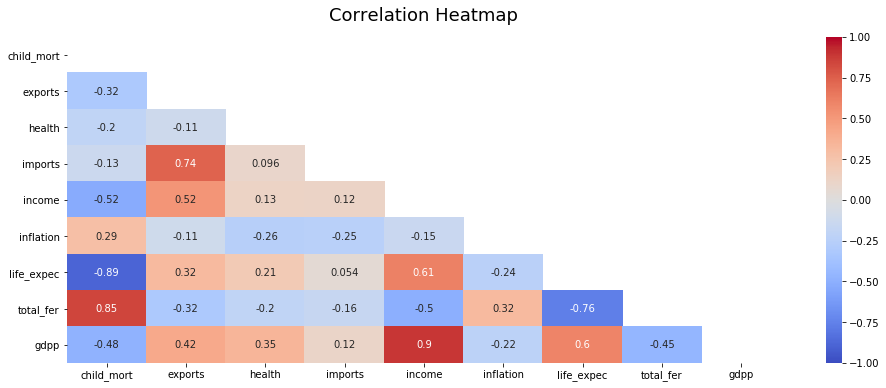

In [5]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

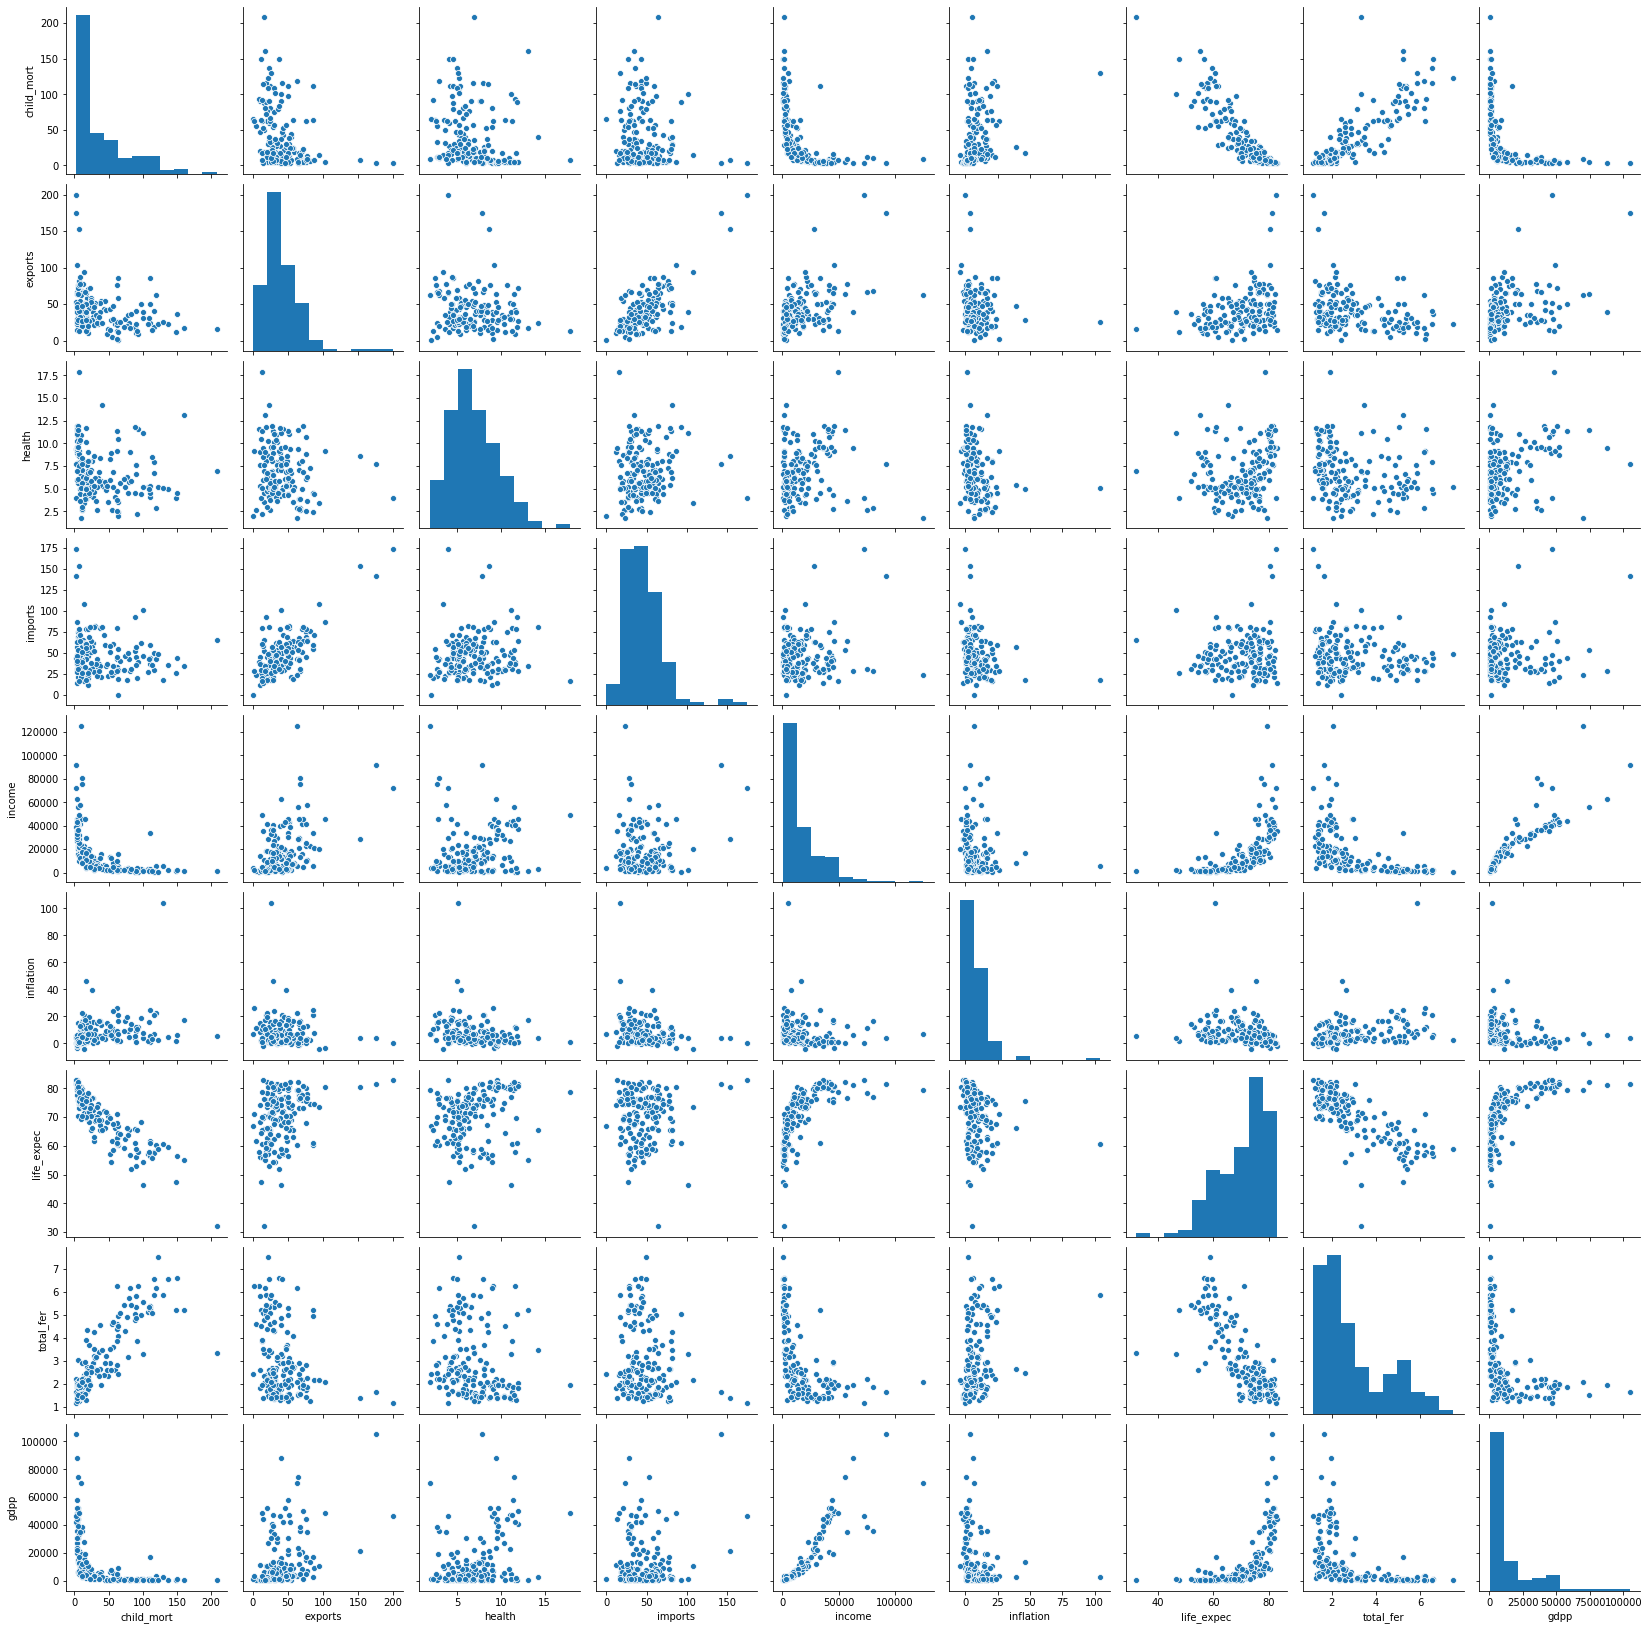

In [6]:
sns.pairplot(df)

In [7]:
df.set_index('country', inplace=True)

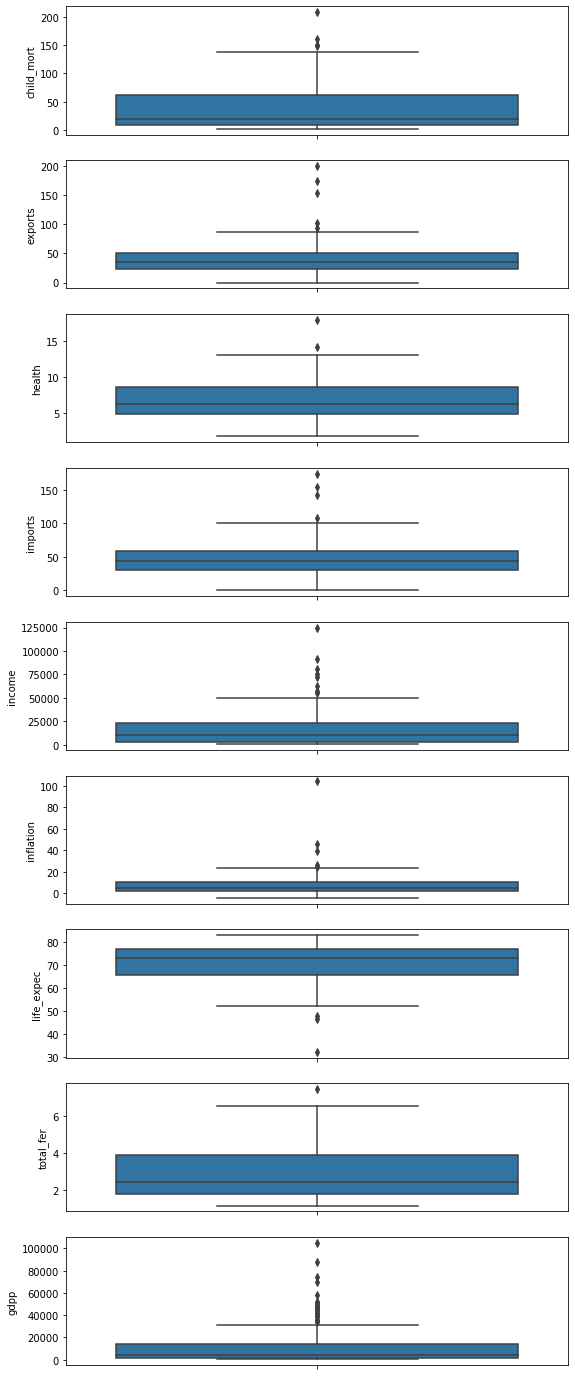

In [8]:
column_names = df.columns
fig, axes = plt.subplots(nrows=len(column_names), figsize=(9,25))
for i in range(len(column_names)):
    sns.boxplot(ax=axes[i], y=column_names[i], data=df)

In [9]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1, Q3 = np.percentile(datacolumn, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [10]:
for col in df.columns:
    lowerbound, upperbound = outlier_treatment(df[col])
    df[col] = np.clip(df[col], a_min=lowerbound, a_max=upperbound)

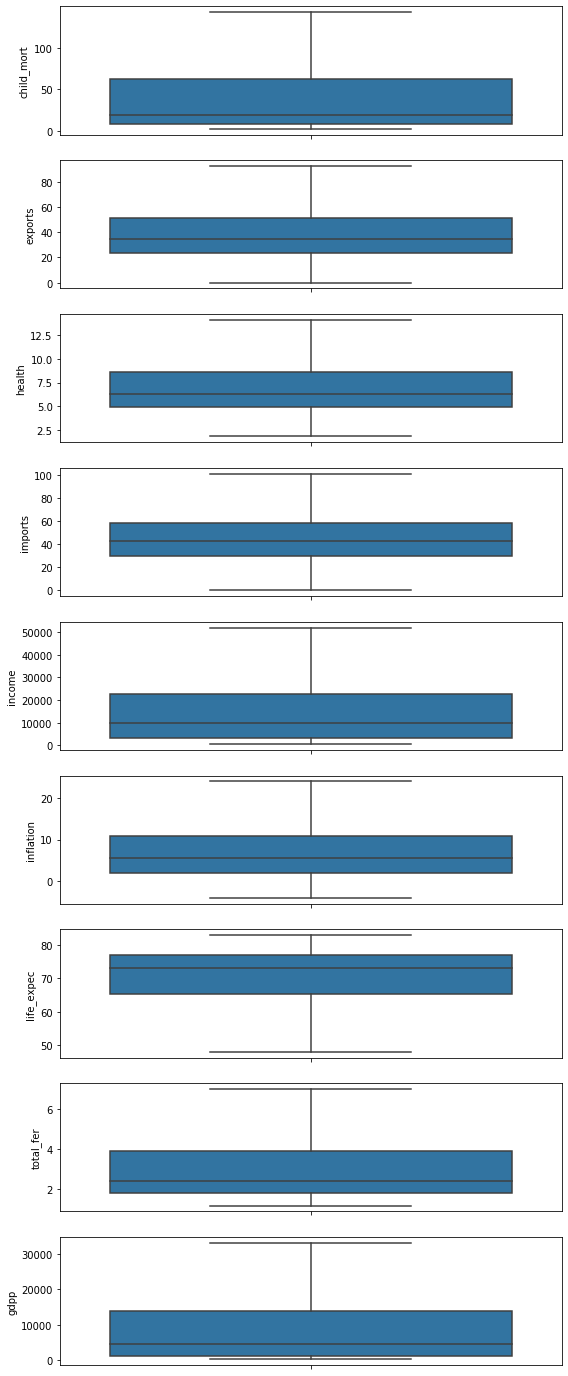

In [11]:
columns_name = df.columns
fig, axes = plt.subplots(nrows=len(column_names), figsize=(9,25))

for i in range(len(columns_name)):
    sns.boxplot(ax=axes[i], y=column_names[i], data=df)

In [12]:
from sklearn.preprocessing import StandardScaler

column_names = df.columns
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, index=data.country, columns=column_names)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341
Albania,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
Algeria,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868
Angola,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198
Antigua and Barbuda,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.221723,0.332264,-0.579893,0.337212,-0.855555,-0.664945,-0.901941,0.369691,-0.637569
Venezuela,-0.537419,-0.520004,-0.707708,-1.393742,0.038151,2.557260,0.557401,-0.316495,0.271975
Vietnam,-0.375657,1.528265,0.017828,1.693373,-0.753982,0.753184,0.286717,-0.662919,-0.780954


## K-means Clustering

In [13]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=123).fit(df)

In [14]:
k_means.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [15]:
df_final = data.copy()

In [16]:
df_final.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [17]:
df_final['KMeans_clusters'] = k_means.labels_

In [18]:
df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [19]:
df_final[df_final['KMeans_clusters']==0].head()
# where:
# 0 - developed
# 1 - developing
# 2 - undeveloped

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_clusters
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0


In [20]:
df_final['KMeans_clusters'].replace({0:'Developed', 
                                     1:'Developing', 
                                     2:'Undeveloped'}, inplace=True)

In [21]:
df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Undeveloped
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Undeveloped
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing


In [22]:
df_final.KMeans_clusters.value_counts()

Developing     79
Undeveloped    47
Developed      41
Name: KMeans_clusters, dtype: int64

## Hierarchical Clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit_predict(df)
# these parameters are deaults: affinity='euclidean', linkage='ward'
# it's not important to write them

In [25]:
df_final['Hierachical_clusters'] = hc

In [26]:
hc

array([2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1,
       1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 0,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2,
       2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1,
       0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2], dtype=int64)

In [27]:
df_final[df_final['Hierachical_clusters']==2].head()
# where:
# 0 - developed
# 1 - developing
# 2 - undeveloped

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_clusters,Hierachical_clusters
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,Undeveloped,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,Undeveloped,2
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,Undeveloped,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,Undeveloped,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,Undeveloped,2


In [28]:
df_final['Hierachical_clusters'].replace({0:'Developed', 
                                          1:'Developing', 
                                          2:'Undeveloped'}, inplace=True)

In [29]:
df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_clusters,Hierachical_clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Undeveloped,Undeveloped
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing,Developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Undeveloped,Undeveloped
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing,Developed


In [30]:
df_final.Hierachical_clusters.value_counts()

Developed      71
Developing     61
Undeveloped    35
Name: Hierachical_clusters, dtype: int64

#### Later, it was found that KMeans performed better that Hierachical clustering (because it showed Turkmenistan and Kyrgyzystan as developed countries)

## Principal Component Analysis

In [31]:
data.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [32]:
from sklearn.decomposition import PCA

In [33]:
social_score = ['child_mort', 'health', 'life_expec', 'total_fer']
economy_score = ['exports', 'imports', 'income', 'inflation', 'gdpp']

In [34]:
pca = PCA(n_components=1)

In [46]:
pca_social = pca.fit_transform(X=df[social_score])                   # this tranforms into matrix form (array)
pca_social = pd.DataFrame(data=pca_social, columns=['social_score']) # to make it editable
 
pca_economy = pca.fit_transform(X=df[economy_score])
pca_economy = pd.DataFrame(data=pca_economy, columns=['economical_score'])

In [47]:
df_pca = pd.concat([pca_economy, pca_social, df_final[["country", 'Hierachical_clusters', "KMeans_clusters"]]], axis=1)

In [48]:
df_pca.head()

,economical_score,social_score,country,Hierachical_clusters,KMeans_clusters
0,-1.763849,2.755081,Afghanistan,Undeveloped,Undeveloped
1,-0.624135,-1.153072,Albania,Developing,Developing
2,-1.011411,-0.364122,Algeria,Developing,Developing
3,-0.941858,3.416022,Angola,Undeveloped,Undeveloped
4,0.755015,-1.063376,Antigua and Barbuda,Developed,Developing


In [44]:
df_pca = pd.concat([pca_economy, pca_social, df_final], axis=1)

In [45]:
df_pca.head()

,economical_score,social_score,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_clusters,Hierachical_clusters
0,-1.763849,2.755081,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Undeveloped,Undeveloped
1,-0.624135,-1.153072,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing,Developing
2,-1.011411,-0.364122,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing,Developing
3,-0.941858,3.416022,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Undeveloped,Undeveloped
4,0.755015,-1.063376,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing,Developed
